<a href="https://colab.research.google.com/github/erikaminarikova/Ordinal_Sums/blob/main/Example_6_california_housing_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation of Data

In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [39]:
# identify outliers
from scipy import stats

z = np.abs(stats.zscore(df))
threshold = 3
# remove outliers
df_o = df[(z<3).all(axis=1)]

In [40]:
# normalize the data
columns = df_o.columns
scaler = MinMaxScaler()
model = scaler.fit_transform(df_o)
df_scaled = pd.DataFrame(model, columns = columns)

In [41]:
data = pd.DataFrame()
data = df_scaled[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

data['target'] = df_scaled['MedHouseVal']

In [42]:
data['target'] = data.apply(lambda row: 0 if (row['target']<=0.5)   else 1, axis=1)

In [9]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.864082,0.784314,0.529080,0.316547,0.066238,0.054379,0.567481,0.216327,1
1,0.861454,0.392157,0.464777,0.292740,0.497924,0.040955,0.565356,0.217347,1
2,0.746174,1.000000,0.641483,0.339303,0.102367,0.061810,0.564293,0.215306,1
3,0.567920,1.000000,0.428507,0.339125,0.115241,0.054150,0.564293,0.214286,1
4,0.369504,1.000000,0.468546,0.342803,0.116694,0.043113,0.564293,0.214286,1
...,...,...,...,...,...,...,...,...,...
19789,0.117091,0.470588,0.361971,0.366758,0.174834,0.054531,0.737513,0.332653,0
19790,0.227126,0.333333,0.454080,0.450404,0.073297,0.071464,0.738576,0.320408,0
19791,0.132517,0.313725,0.375770,0.360687,0.208472,0.047455,0.732200,0.319388,0
19792,0.150979,0.333333,0.386456,0.384447,0.153239,0.041358,0.732200,0.309184,0


In [43]:
# splitting dataframe 1/3 train 2/3 test
df_train, df_test = train_test_split(data, test_size=0.66, random_state=42)

In [45]:
def calculate_tests(target_values, value):
  MSE = mean_squared_error(target_values, value)
  RMSE = math.sqrt(MSE)
  print('Mean squared error = ', MSE)
  print('Root Mean Square Error = ', RMSE)
  print('Accuracy score = ', accuracy_score(target_values, value))
  print('F1 = ', f1_score(target_values, value, average= 'macro'))
  print('Precision = ', precision_score(target_values, value, average= 'macro'))
  print('Recall = ', recall_score(target_values, value, average= 'macro'))
  #confusion matrix
  confusion_matrix = metrics.confusion_matrix(target_values, value)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
  #confucion matrif for 3 target classes
  #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
  cm_display.plot()
  plt.show()

Logistic Regression

In [44]:
# Reshaped for logistic regression function
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

In [46]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
print(logr.coef_, logr.intercept_)

[[ 9.74381002  1.8782737  -2.39053352  4.091704    0.22025304 -8.96659359
  -8.17946246 -8.65935896]] [0.75742375]


In [47]:
#predict for all input values
predicted=logr.predict(X)

In [48]:
df_train["predicted"]=predicted

Mean squared error =  0.13954525189478378
Root Mean Square Error =  0.37355756168866905
Accuracy score =  0.8604547481052163
F1 =  0.7946084269585674
Precision =  0.8369173054217961
Recall =  0.7699033949869474


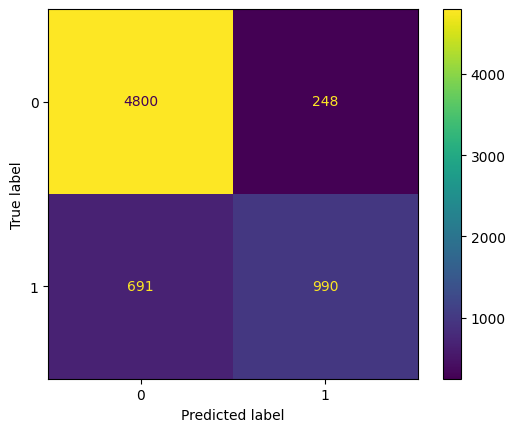

In [17]:
# calculate tests for train dataset
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)

In [49]:
X_t = df_test[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y_t = df_test[["target"]]

In [50]:
predicted=logr.predict(X_t)

In [51]:
df_test['predicted_test'] = predicted

Mean squared error =  0.14458476846536547
Root Mean Square Error =  0.38024303868100656
Accuracy score =  0.8554152315346345
F1 =  0.7897356286734978
Precision =  0.8369428235913916
Recall =  0.7640528637735329


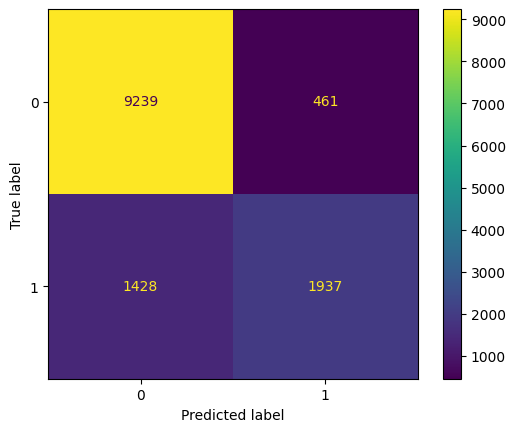

In [52]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted_test']].values
calculate_tests(target_values, value)

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [24]:
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

In [25]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

<ipython-input-25-c924fe5b2ba8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

In [53]:
predicted=clf.predict(X)
df_train["predicted"]=predicted

Mean squared error =  0.18368256798930005
Root Mean Square Error =  0.4285820434751088
Accuracy score =  0.8163174320107
F1 =  0.6756941519975295
Precision =  0.8362307165222704
Recall =  0.6494234763286135


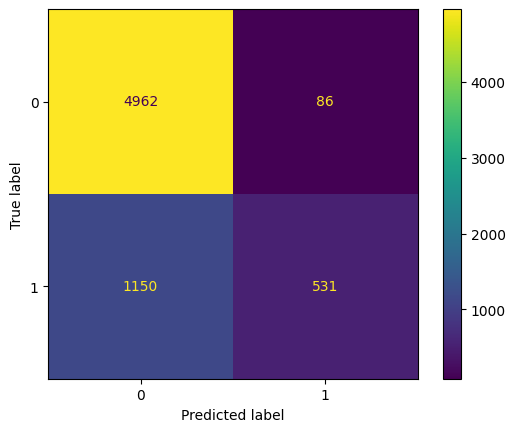

In [54]:
# calculate tests for train dataset
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)

In [26]:
X_t = df_test[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [27]:
predicted=clf.predict(X_t)
df_test["predicted"]=predicted

Mean squared error =  0.19701492537313434
Root Mean Square Error =  0.4438636337583136
Accuracy score =  0.8029850746268656
F1 =  0.6560706504081869
Precision =  0.8199828820052235
Recall =  0.6354862057872888


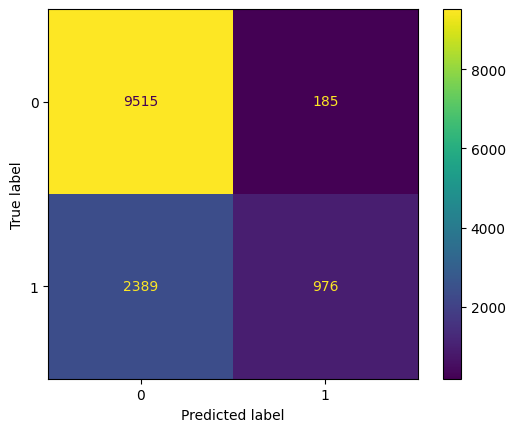

In [28]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted']].values
calculate_tests(target_values, value)

Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

In [31]:
gnb = GaussianNB()
gnb.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [55]:
predicted=gnb.predict(X)
df_train["predicted"]=predicted

Mean squared error =  0.1717937286372418
Root Mean Square Error =  0.4144800702533739
Accuracy score =  0.8282062713627583
F1 =  0.7609612042156397
Precision =  0.7740757268424612
Recall =  0.7507904485764737


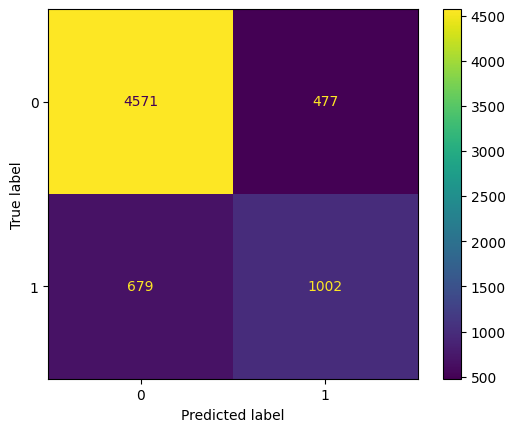

In [56]:
# calculate tests for train data
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)

In [32]:
predicted=gnb.predict(X_t)
df_test["predicted"]=predicted

Mean squared error =  0.18163030998851895
Root Mean Square Error =  0.42618107652559956
Accuracy score =  0.8183696900114811
F1 =  0.7510495155733907
Precision =  0.7656487756576829
Recall =  0.7402689143855027


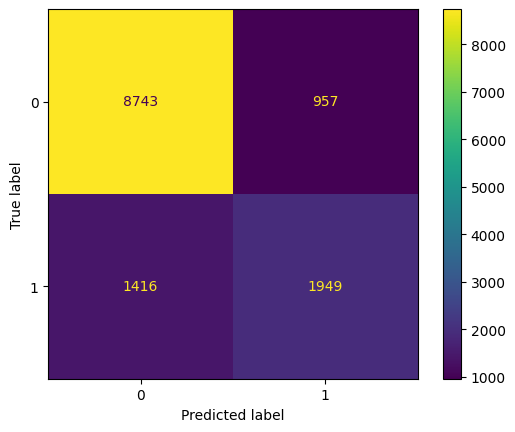

In [33]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted']].values
calculate_tests(target_values, value)

In [35]:
df_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,predicted_test,predicted
17298,0.882500,0.666667,0.511942,0.324788,0.386836,0.058391,0.497343,0.243878,1,1,1
17930,0.351737,0.176471,0.506048,0.367698,0.219684,0.075735,0.859724,0.205102,0,0,0
4031,0.209635,0.843137,0.264338,0.377597,0.249377,0.082824,0.166844,0.629592,0,0,0
3699,0.334092,0.235294,0.241546,0.313634,0.387043,0.047524,0.176408,0.601020,0,0,0
17294,0.980930,0.392157,0.676985,0.333466,0.375415,0.074810,0.497343,0.246939,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9727,0.396347,0.666667,0.381133,0.298116,0.218646,0.064309,0.148778,0.651020,0,0,0
7489,0.241415,0.352941,0.268994,0.300560,0.253115,0.058836,0.147715,0.634694,0,0,0
12071,0.163844,0.705882,0.339651,0.312070,0.186669,0.053721,0.636557,0.292857,0,0,0
17201,0.470451,0.686275,0.374813,0.251863,0.153032,0.046199,0.509033,0.244898,1,1,0
